In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

sys.path.append('../src/')
from configs import *
from plotting import *

import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.transforms import Bbox
rcParams.update(fig_params)

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

## Load optimization results

In [2]:
results = pd.read_pickle('../results/optimization_results 3.pickle')
results = results.dropna()
results.head(10)

Initial_Penetration Best_solution Best_fitness  \
Input_peptide Generation                                                  
MILPTGPTSFKE  1                     0.363274  MILPRNPPSFKD     0.333333   
              2                     0.363274  WILPTGPTSFKE     0.181079   
              3                     0.363274  MILPRGPTAFKE       0.1447   
              4                     0.363274  MILPRGPTSFKE     0.095238   
              5                     0.363274  MILPRGPTSFKE     0.095238   
              6                     0.363274  MILPRGPTSFKE     0.095238   
              7                     0.363274  MILPRGPTSFKE     0.095238   
              8                     0.363274  MILPRGPTSFKE     0.095238   
              9                     0.363274  MILPRGPTSFKE     0.095238   
              10                    0.363274  MILPRGPTSFKE     0.095238   

                         Penetration_score Anomaly_score Different_letters  
Input_peptide Generation                                                    
MILPTGPTSFKE  1                   0.892122      1.006586                 4  
              2                   0.645259      1.098303                 1  
              3                   0.795445      1.013127                 2  
              4                   0.896707      1.083182                 1  
              5                   0.896707      1.083182                 1  
              6                   0.896707      1.083182                 1  
              7                   0.896707      1.083182                 1  
              8                   0.896707      1.083182                 1  
              9                   0.896707      1.083182                 1  
              10                  0.896707      1.083182                 1

In [3]:
# Function to compare peptide strings and update the matrix
def update_matrix(matrix, original, mutated):
    for o, m in zip(original, mutated):
        if o != m:
            matrix.at[o, m] += 1
    return None
          
amino_acids = [
    'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
    'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'
]
MAX_ITER = 50

# Create an empty 20x20 DataFrame 
matrix = pd.DataFrame(0, index=amino_acids, columns=amino_acids)

# Iterate over the results DataFrame,compare sequences, and update the matrix
tmp = results.loc[(slice(None), MAX_ITER),:].copy()

for index, row in tqdm(tmp.iterrows(), total=len(tmp)):
    input_peptide = index[0]
    best_solution = row['Best_solution']
    update_matrix(matrix, input_peptide, best_solution)

  0%|          | 0/2098 [00:00<?, ?it/s]

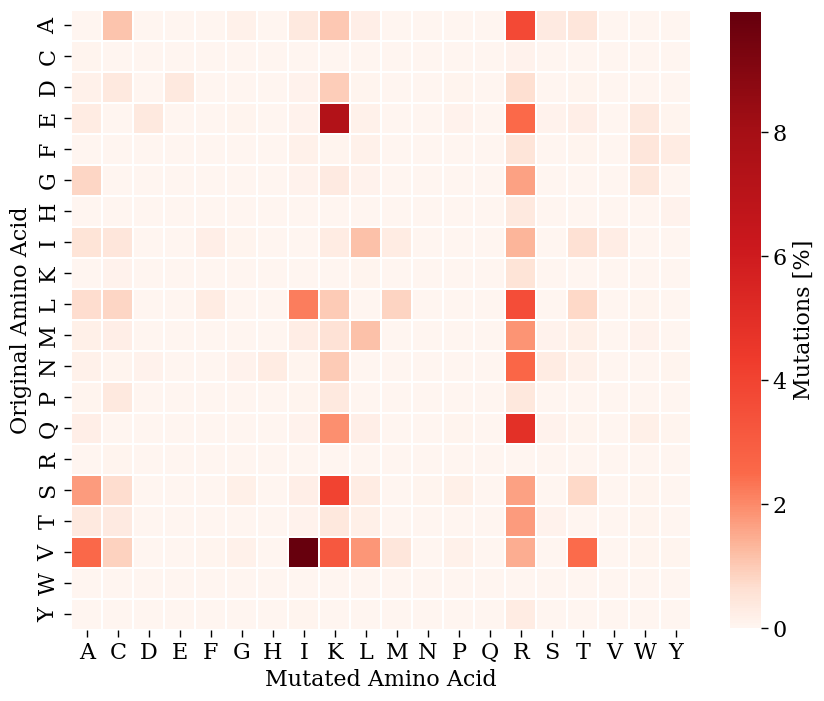

In [4]:
fig_params['figure.figsize'] = (10,10)
fig_params['xtick.minor.visible'] = False
fig_params['ytick.minor.visible'] = False
fig_params['xtick.top'] = False
fig_params['ytick.right'] = False
fig_params['xtick.direction'] = 'out'
fig_params['ytick.direction'] = 'out'
fig_params['xtick.labelsize'] = 16
fig_params['ytick.labelsize'] = 16
fig_params['axes.labelsize'] = 16
fig_params['xtick.major.size'] = 5
fig_params['ytick.major.size'] = 5
fig_params['xtick.major.width'] = 1
fig_params['ytick.major.width'] = 1
rcParams.update(fig_params)

orig_cmap = matplotlib.cm.Reds
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted')

ax = sns.heatmap((100*matrix / matrix.sum().sum()).round(2), 
                cmap=shifted_cmap, 
                #vmin=1.56, 
                #vmax=4.15, 
                square=True,
                linewidth=0.3, 
                cbar_kws={'shrink': .80, 'label': 'Mutations [%]'}, 
    #           annot=True, 
    #           fmt='.1f'
               )
ax.set_ylabel('Original Amino Acid')
ax.set_xlabel('Mutated Amino Acid')
plt.show()

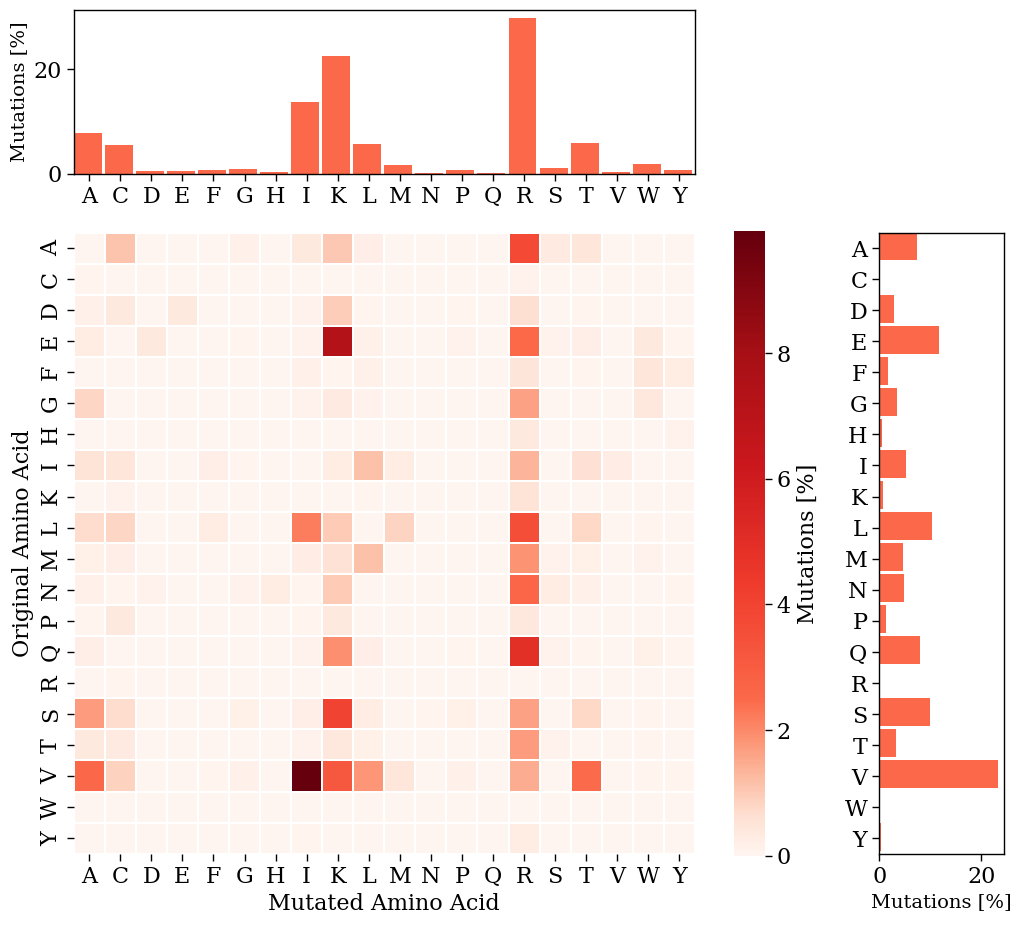

In [5]:
fig_params['figure.figsize'] = (10,10)
fig_params['xtick.minor.visible'] = False
fig_params['ytick.minor.visible'] = False
fig_params['xtick.top'] = False
fig_params['ytick.right'] = False
fig_params['xtick.direction'] = 'out'
fig_params['ytick.direction'] = 'out'
fig_params['xtick.labelsize'] = 16
fig_params['ytick.labelsize'] = 16
fig_params['axes.labelsize'] = 16
fig_params['xtick.major.size'] = 5
fig_params['ytick.major.size'] = 5
fig_params['xtick.major.width'] = 1
fig_params['ytick.major.width'] = 1
fig_params['axes.grid'] = False
rcParams.update(fig_params)

orig_cmap = matplotlib.cm.Reds
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted')

fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(3,3, hspace=.05, wspace=.1, width_ratios=(5, 1, 1), height_ratios=(1, 1, 5))

ax0 = fig.add_subplot(gs[1:, 0:2])
sns.heatmap((100*matrix / matrix.sum().sum()).round(2), 
                cmap=shifted_cmap, 
                #vmin=1.56, 
                #vmax=4.15, 
                square=True,
                linewidth=0.3, 
                cbar_kws={'shrink': .80, 'label': 'Mutations [%]'},
                 ax=ax0,
            cbar=True
    #           annot=True, 
    #           fmt='.1f'
               )
ax0.set_ylabel('Original Amino Acid')
ax0.set_xlabel('Mutated Amino Acid')

ax1 = fig.add_subplot(gs[1:, 2], sharey=ax0)
ax1.barh(np.arange(matrix.shape[0]), (100*matrix / matrix.sum().sum()).round(2).sum(axis=1), align='edge', color=(0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), height=0.9)
#ax1.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax1.set_xlabel('Mutations [%]', size=14)

(x0m, y0m), (x1m, y1m) = ax0.get_position().get_points()  # main heatmap
(x0v, y0v), (x1v, y1v) = ax1.get_position().get_points()  # vertical histogram
ax1.set_position(Bbox([[x0v, y0m], [x1v, y1m]]))

ax2 = fig.add_subplot(gs[0, :2], sharex=ax0)
ax2.bar(np.arange(matrix.shape[0]), (100*matrix / matrix.sum().sum()).round(2).sum(axis=0), align='edge', color=(0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), width=0.9)
ax2.set_ylabel('Mutations [%]', size=14)
#ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

(x0h, y0h), (x1h, y1h) = ax2.get_position().get_points()
ax2.set_position(Bbox([[x0m, y0h-0.03], [x1m, y1h]]))

plt.show()

In [6]:
FIG_SIZE = (15,15)
SAVE_FIG = True
FIG_FMT = 'pdf'
TRANSPARENT_PNG=True

save_fig(
    fig,
    'Mutation_matrix',
    fig_dir=os.path.join('..','figures'),
    fig_fmt=FIG_FMT,
    save=SAVE_FIG, 
    fig_size=FIG_SIZE,
    transparent_png=TRANSPARENT_PNG,
)